#Kelompok 1 🦕

`Pembagian Tugas Kelompok`

- Mahza Reyhan Pramono (Line 1-5)
- Sarah Zakia (Line 6-9)
- Rahayu Eka Fitriani (Line 10-13)
- Rahel Tesa Efesia S (Line 14-17)
- Anisa Chandra Nitis L (Line 18-21)
- Bahrul Zakaria (Line 22-25)


#Task yang harus dikerjakan 🔴
- Melakukan EDA
- Menentukan model machine learning yang tepat

**Prediksi umur abalone menggunakan kondisi pengukuran fisik. Umur abalone ditentukan dengan memotong cangkangnya, menodai, dan menghitung jumlah 'ring' melalui mikroskop.**

Sex 			: Male, Female, and I (infant)\
Length 		: Panjang cangkang dalam milimeter\
Diameter 		: Diameter dalam milimeter\
Height 			: Tinggi termasuk daging dalam cangkang dalam milimeter\
Whole weight 		: Berat keseluruhan abalone dalam gram\
Shucked weight	: Berat daging abalone gram\
Viscera weight 	: Berat usus abalone setelah dikeringkan gram\
Shell weight 		: Berat cangkang setelah dikeringkan gram\
Rings 			: Jumlah rings yang jika ditambahkan 1.5 akan menunjukkan umur abalon

# Import Data

In [ ]:
#import python libraries yang relevant
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('colorblind')

In [ ]:
#import data dari gdrive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/python/Abalone.csv'



Mounted at /content/drive


In [ ]:
#change directory ke folder di drive tempat menyimpan file

%cd /content/drive/MyDrive/python

/content/drive/MyDrive/python


In [ ]:
#read file di folder drive
raw_data = pd.read_csv(r'Abalone.csv')
B, K = raw_data.shape
print('Baris = ', B, ', Kolom = ', K)
raw_data.head(5) #membaca 5 teratas

Baris =  4177 , Kolom =  9


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
#menambah kolom age dengan menambah value dari data rings dengan 1.5
raw_data["age"] = raw_data["Rings"] + 1.5
raw_data.head(5) #melihat 5 teratas

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [ ]:
#Cek info data
print(raw_data.info())

#Summary dari data
raw_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB
None


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000


In [ ]:
#membuat checkpoint

data = raw_data.copy()

# Exploratory Data Analysis

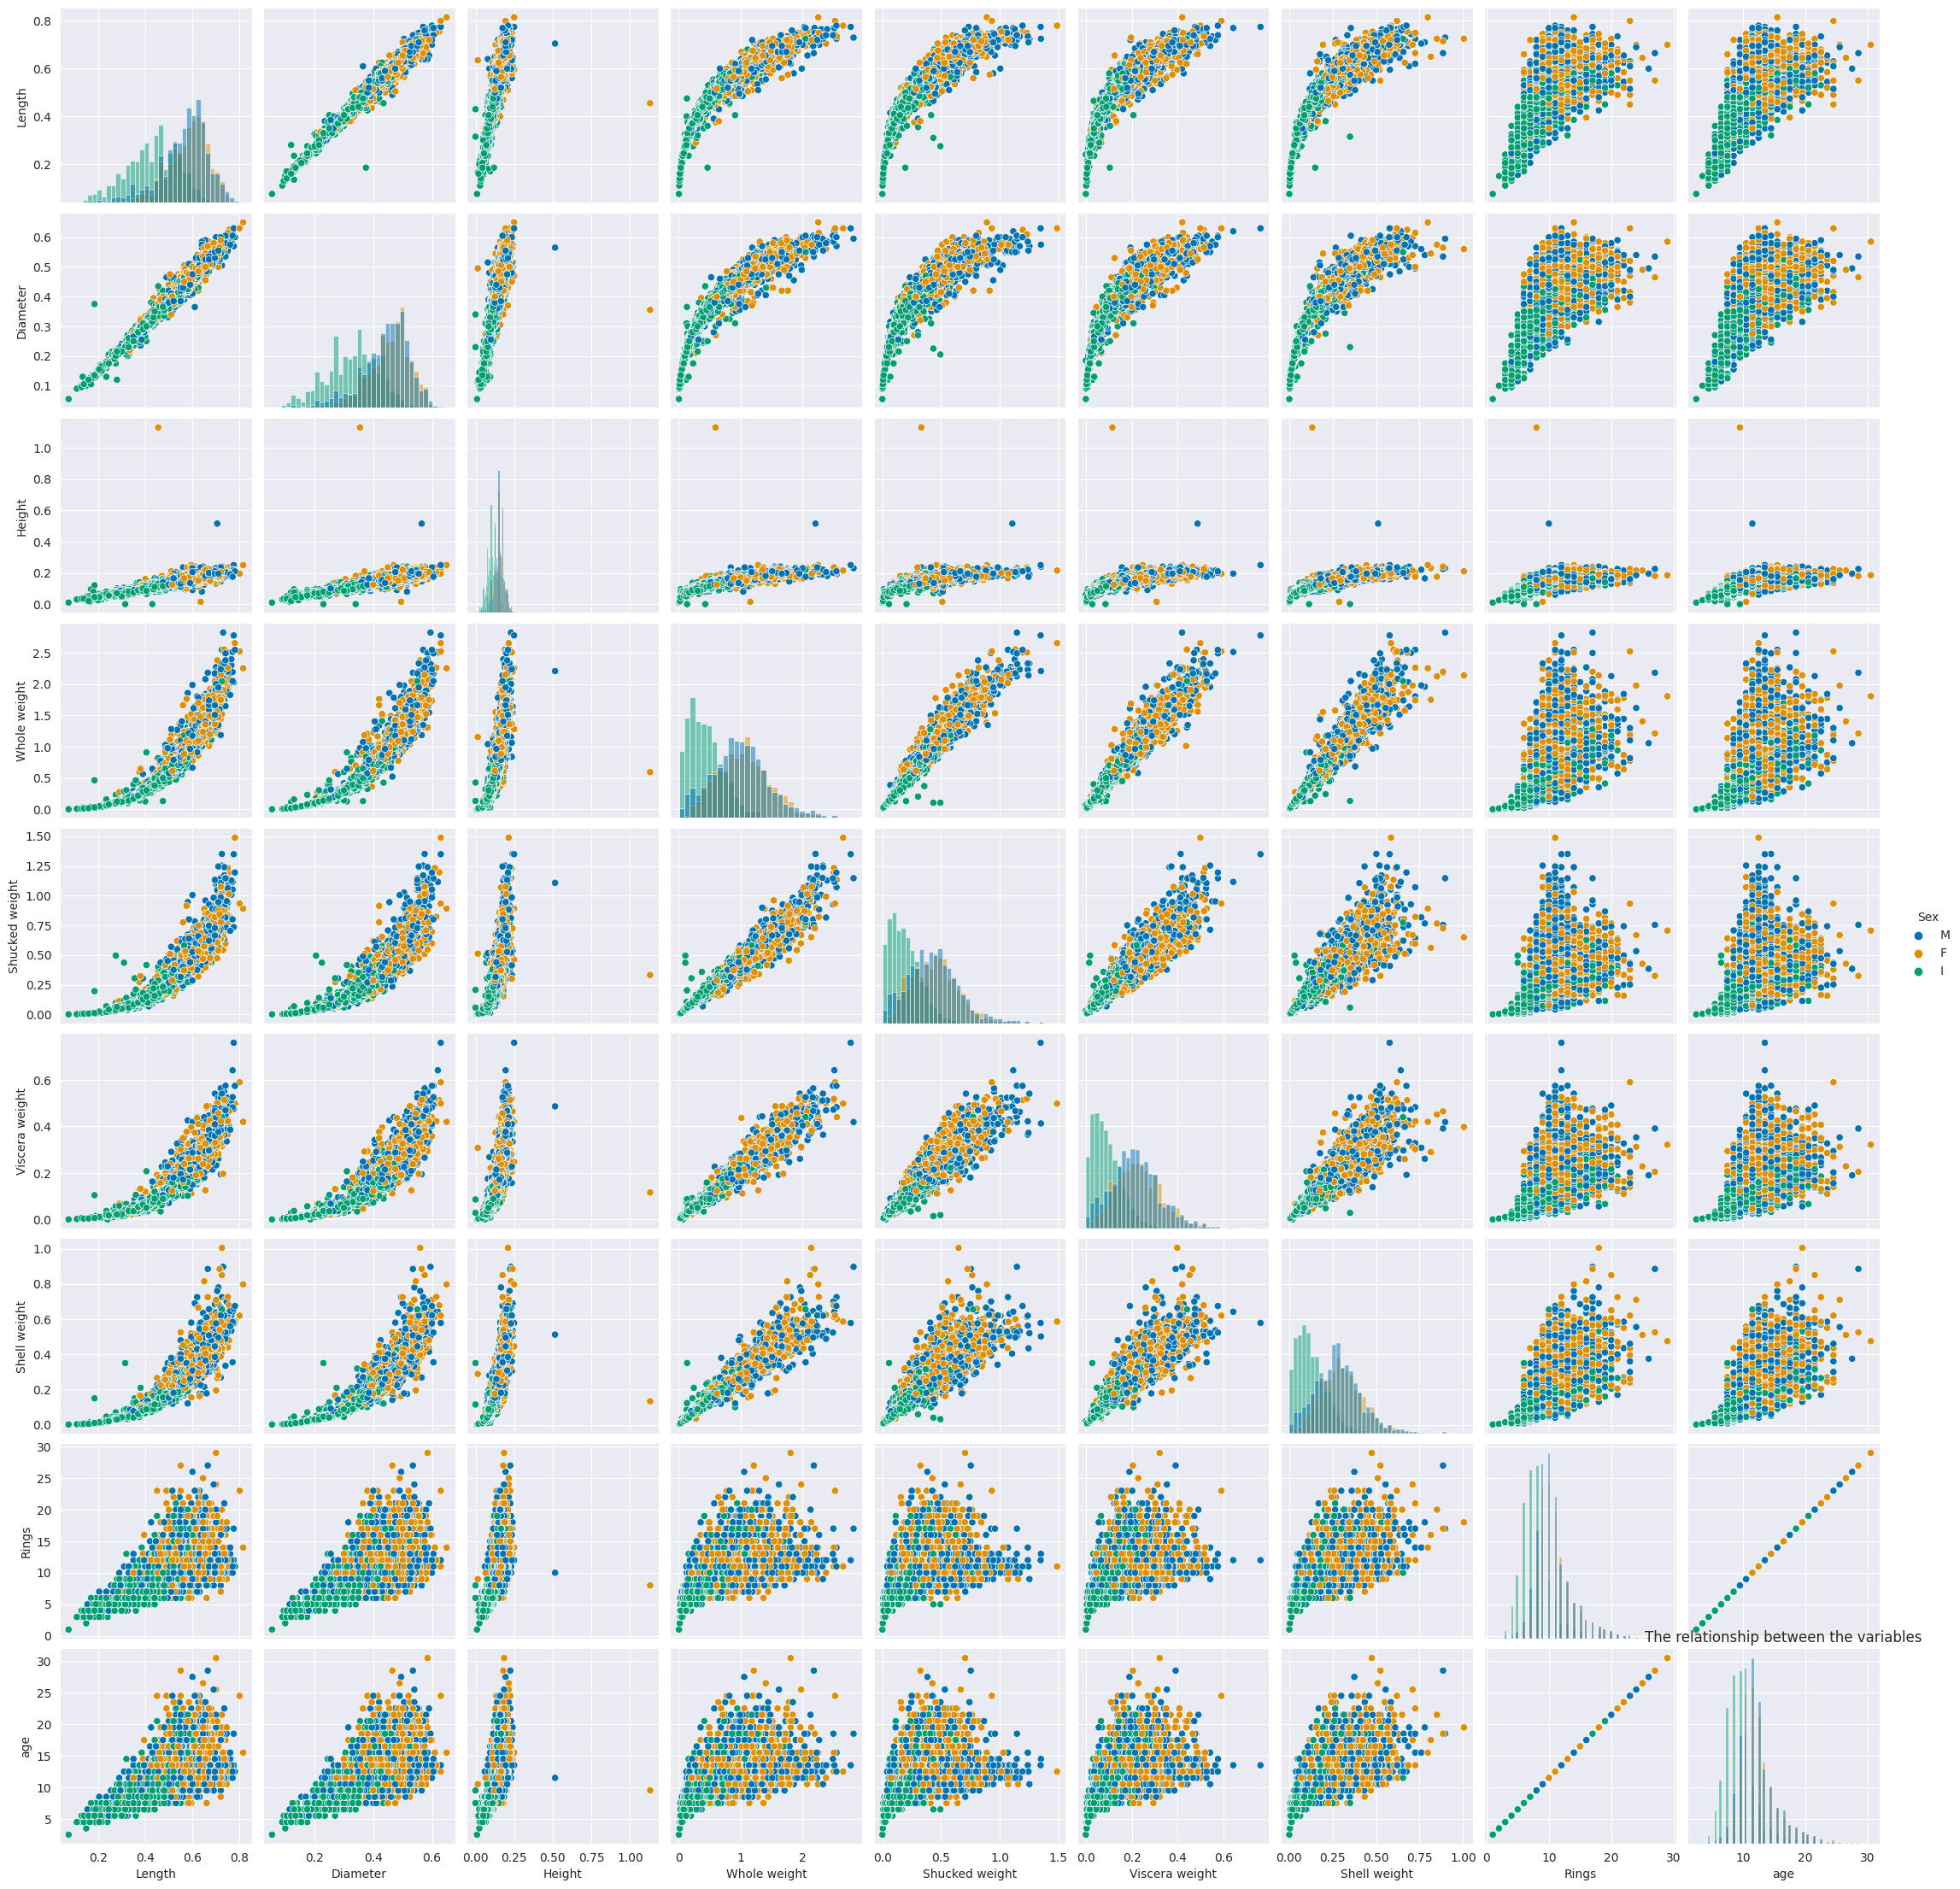

In [ ]:
#memvisualisasi hubungan antar fitur
sns.pairplot(
             data=data,
             vars=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings', 'age'],
             hue='Sex',
             kind='scatter',
             diag_kind='hist'

)
plt.title('The relationship between the variables')
plt.show()

Observasi

- Kita melihat dengan jelas, bagaimana setiap pasangan fitur dalam data berhubungan satu sama lain, ini adalah langkah yang sangat penting yang membantu menghindari keadaan yang menyebabkan masalah dalam pemodelan (keadaan multikolinier).
- Dari pairplot tersebut, kita dapat melihat bahwa beberapa data berkorelasi positif dan beberapa data lainnya tidak linier.
- Sebagian besar data terdistribusi secara normal dan pengaruh outlier tidak tinggi, kecuali fitur 'Tinggi Badan'
- Tinggi badan memiliki kemiringan yang tepat, sebagian besar data berada di bawah 0,23.

## Visualising the relationship between weight, age and sex

<ipython-input-14-7fa09cdfd66c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=data, x='Sex', y='Whole weight', kind='bar', ci=None, order=['I','M','F'])


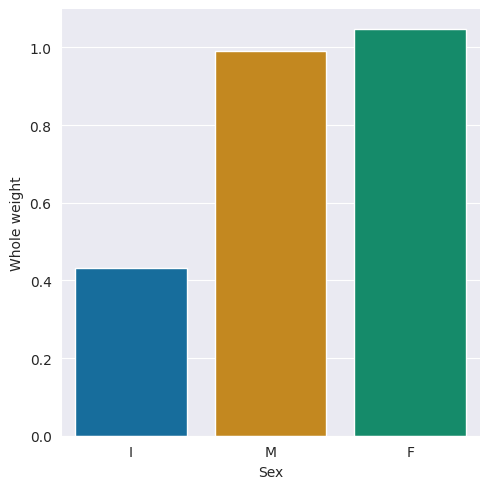

In [ ]:
#Barchart dari sex terhadap weight
sns.catplot(data=data, x='Sex', y='Whole weight', kind='bar', ci=None, order=['I','M','F'])
plt.show()

Observations

•	The average weight of infant is below 0.5

•	The average weight of male is below 1.0

•	The average weight of female is above 1

•	The females are the heaviest

•	At 95% confidence interval

o	The age range of infant is 0-16 years

o	The age range of male is 6-25 years

o	The age of the male is more spread

o	The median of male and female is almost the same.

o	The age range of female is 8-29 years

•	For each sex category the relationship between weight and age is positively correlated i.e as age increases weight increases and vice versa



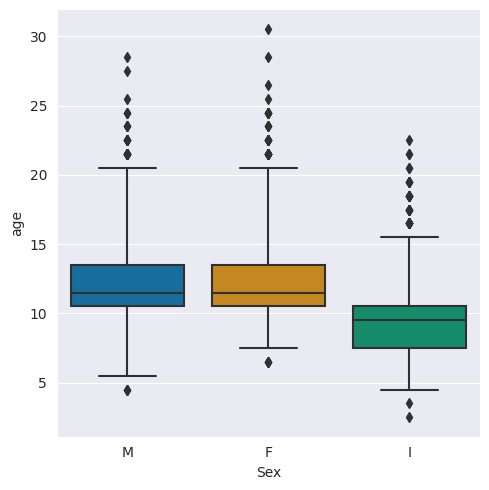

In [ ]:
#Boxplot dari sex didistribusikan dengan age
sns.catplot(x='Sex', y='age', data=data, kind='box', whis=[0.25, 97.5])
plt.show()

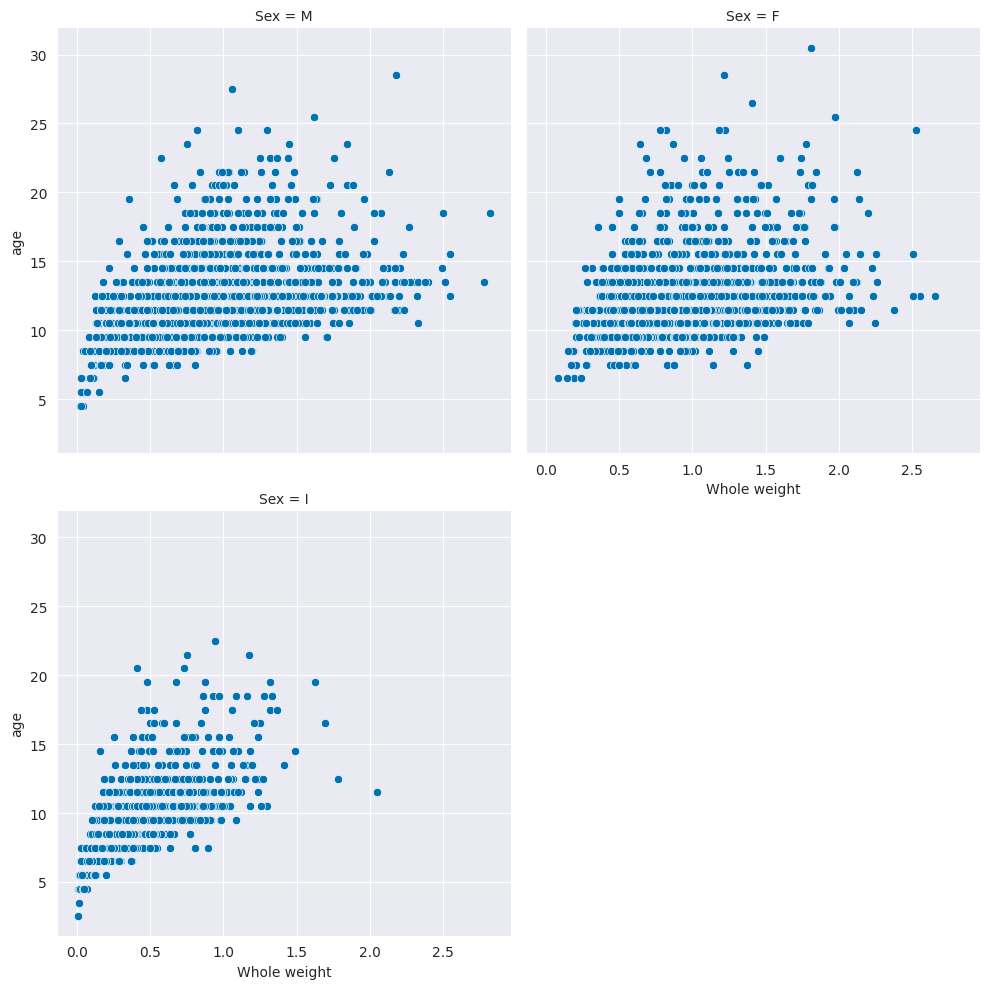

In [ ]:
#Scatter plot dari whole_wt dengan age
sns.relplot(x='Whole weight', y='age', data=data, col='Sex', col_wrap=2)
plt.show()

# Data preprocessing

Karena semua data sudah dalam tipe yang tepat
- Kita perlu membuang rings dari data karena kita mencoba memprediksi usia tanpa harus mendapatkan rings
- Kemudian kita pisahkan target dari fitur-fiturnya
- Langkah selanjutnya adalah membagi data menjadi data latih dan data uji
- Kami kemudian mengurangi efek outlier pada data dengan memasukkan nilai di mana ada outlier

In [ ]:
#drop rings dari  data
data = data.drop('Rings', axis=1)

#memisahkan fitur dengan target
inputs = data.drop('age', axis=1)
targets = data.loc[:,['age']]

#Bagi dataset into train dan test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(
                                                                          inputs,
                                                                          targets,
                                                                          test_size=0.2,
                                                                          random_state=1,
                                                                          shuffle=True

)
print(inputs_train.shape, targets_train.shape)

(3341, 8) (3341, 1)


In [ ]:
#memperhatikan outliers di setiap column
#menghapus outliers
def outlier_imputer(df, col):
    percentile_2= np.quantile(df[col], 0.025)
    df[col] = np.where(df[col]<percentile_2, percentile_2, df[col])
    percentile_97= np.quantile(df[col], 0.975)
    df[col] = np.where(df[col]>percentile_97, percentile_97, df[col])

#Imputing di  outliers
columns = inputs_train.drop('Sex', axis=1).columns
for col in columns:
    outlier_imputer(inputs_test, col)
    outlier_imputer(inputs_train, col)

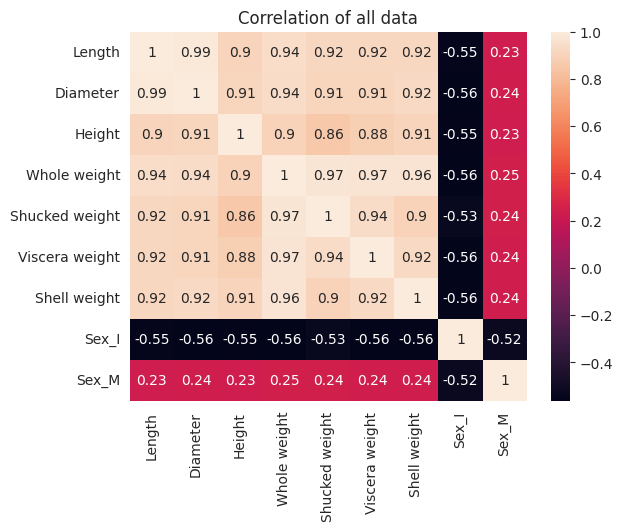

In [ ]:
#membuat variable dummy
inputs_train = pd.get_dummies(inputs_train, drop_first=True)

#mengecek korelasi semua data
sns.heatmap(inputs_train.corr(), annot=True)
plt.title('Correlation of all data')
plt.show()

Sebagian besar data berkorelasi positif kuat, sehingga untuk mendapatkan prediksi yang akurat, kita harus menghubungkan data dan juga menskalakannya. Kami melakukan ini dengan membuat pipeline yang akan melakukan kedua tugas tersebut untuk kami.

## Creating a pipeline

In [ ]:
# Import fungsi yang dibutuhkan  dari sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
# inisiasi StandardScaler, PCA sebagai scaler dan masing - masing pca
scaler = StandardScaler()
pca = PCA()
# buat pipeline menggunakan scaler dan object pca
pipeline = make_pipeline(scaler, pca)
# Fit and transform  model
inputs_train_scaled = pipeline.fit_transform(inputs_train)
inputs_train_scaled.shape

(3341, 9)

# Creating the model

Kita telah melakukan praproses data, menskalakan dan menghubungkannya, sekarang kita harus menemukan model yang memprediksi usia secara akurat tanpa melakukan pencocokan yang berlebihan.
Kita akan mencocokkan data menggunakan model berikut:
- RandomForestRegressor()
- GradientBoostingRegressor()
- AdaBoostRegressor()
- LinearRegression()
- Lasso()
- Ridge()
Kemudian kami melakukan validasi silang menggunakan cross_val_score()
- Kami mengevaluasi model dengan menggunakan metrik berikut
o root_mean_squared_error
o skor r2

In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Inisiasi RandomForest sebagai 'rf' dengan 500 estimators
rf = RandomForestRegressor(
                           max_depth = 4,
                           max_features = 'auto',
                           min_samples_leaf = 0.12,
                           n_estimators =500,
                           random_state = 1)

# Fit rf ke training set
rf.fit(inputs_train_scaled, targets_train)
# Predict target dari training set
target_pred = rf.predict(inputs_train_scaled)
# Evaluasi model menggunakan RMSE dan r2_scores
rmse_score = np.round(mean_squared_error(target_pred, targets_train)**0.5, 3)
r2_scores= np.round(r2_score(targets_train, target_pred), 3)
# Print out scores
print(rmse_score, r2_scores)

<ipython-input-26-86a92aae6a6f>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(inputs_train_scaled, targets_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


2.485 0.414


In [ ]:
# Import  GradientBoosting dan AdaBoost Regressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
# Inisiasi GradientBooostingRegressor sebagai 'gf' dengan 400 estimators
gf = GradientBoostingRegressor(
							   learning_rate = 0.1,
                               max_depth= 1,
                               max_features = 'auto',
                               min_samples_leaf = 5,
                               min_samples_split = 2,
                               n_estimators = 400,
                               random_state = 1

)
# Fit model ke  training set
gf.fit(inputs_train_scaled, targets_train)
# Predict target dari training dataset
train_pred = gf.predict(inputs_train_scaled)
# kalkulasi  r2_score dan RMSE
r2_scores= np.round(r2_score(targets_train, train_pred), 3)
rmse_score = np.round((mean_squared_error(targets_train, train_pred))**0.5, 3)
#Print values
print(rmse_score, r2_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/li

2.018 0.614


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [ ]:
# Inisiasi AdaBoostRegressor sebagai 'ads' dengan 100 estimators
ads = AdaBoostRegressor(
                        n_estimators=100,
                        random_state=1,
                        learning_rate = 0.1
)
# Fit model ke training dataset
ads.fit(inputs_train_scaled, targets_train)
# Predict targets dari training dataset
train_pred = ads.predict(inputs_train_scaled)
# Evaluasi model menggunakan  r2_score dan rmse_score
r2_scores= np.round(r2_score(targets_train, train_pred), 3)
rmse_score = np.round((mean_squared_error(targets_train, train_pred))**0.5, 3)
# Print out  values
print(rmse_score, r2_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2.263 0.514


In [ ]:
# Import LinearRegression model dari sklearn.linear_model
from sklearn.linear_model import LinearRegression
# Inisiasi LinearRegression sebagai 'lr'
lr = LinearRegression()
# Fit model ke training dataset
lr.fit(inputs_train_scaled, targets_train)
# Predict  training targets
train_pred = lr.predict(inputs_train_scaled)
# Evaluasi model menggunakan  r2_score dan rmse_score
r2_scores= np.round(r2_score(targets_train, train_pred), 3)
rmse_score = np.round((mean_squared_error(targets_train, train_pred))**0.5, 3)
# Print out values
print(rmse_score, r2_scores)

2.171 0.553


In [ ]:
# Importing the model
from sklearn.linear_model import Lasso
# Inisiasi Lasso sebagai 'ls'
ls = Lasso()
# Fit model ke training dataset
ls.fit(inputs_train_scaled, targets_train)
# Predict targets dari training dataser
train_pred = ls.predict(inputs_train_scaled)
# Evaluasi model menggunakan r2_score dan  rmse_score
r2_scores= np.round(r2_score(targets_train, train_pred), 3)
rmse_score = np.round((mean_squared_error(targets_train, train_pred))**0.5, 3)
# Print out  scores
print(rmse_score, r2_scores)

2.667 0.325


In [ ]:
# Import model
from sklearn.linear_model import Ridge
# Inisiasi Ridge sebagai 'rd'
rd = Ridge()
# Fit model ke training dataset
rd.fit(inputs_train_scaled, targets_train)
# Predict targets dari training datasets
train_pred = ls.predict(inputs_train_scaled)
# dapatkan metrics
r2_scores= np.round(r2_score(targets_train, train_pred), 3)
rmse_score = np.round((mean_squared_error(targets_train, train_pred))**0.5, 3)
# Print out values
print(rmse_score, r2_scores)

2.667 0.325


In [ ]:
models = [(rf, 'RandomForestRegressor'),(gf, 'GradientBoostingRegressor'), (ads, 'AdaBoostRegressor'),
          (lr, 'LinearRegression'),(ls, 'Lasso'), (rd, 'Ridge')]
from sklearn.model_selection import cross_val_score
model_scores = {}
for model, name in models:
    cross_val = -cross_val_score(
                                estimator=model,
                                X=inputs_train_scaled,
                                y=targets_train,
                                scoring='neg_mean_squared_error',
                                n_jobs=-1
    )
    model_scores[name] = (cross_val**0.5).mean()

model_scores

{'RandomForestRegressor': 2.5026663182466864,
 'GradientBoostingRegressor': 2.1399310300709047,
 'AdaBoostRegressor': 2.349167632667287,
 'LinearRegression': 2.180288892153526,
 'Lasso': 2.668574263082074,
 'Ridge': 2.1801762657869257}

Pengamatan dari model dan validasi silang
- Hanya model Ridge() yang tidak terlalu cocok
- Oleh karena itu, kami menggunakan Ridge() untuk memprediksi data baru dan juga menggunakannya untuk memprediksi set data uji
- Jika model tersebut memprediksi set data uji dengan baik, kita dapat menyimpulkan bahwa kita dapat memprediksi usia abalon menggunakan atribut fisiknya
- Kami menggunakan RandomForestRegressor() untuk menentukan fitur yang merupakan prediktor usia yang lebih baik

## Testing the model

Agar kita bisa mendapatkan prediksi yang akurat dengan menggunakan model ini, data tersebut harus memiliki format yang sama dengan data pelatihan, oleh karena itu kita harus mengimputasi variabel dummy untuk variabel kategorikal, kemudian menskalakan dan mengaitkan data tersebut dengan meneruskannya ke dalam pipeline yang telah dibuat.

In [ ]:
inputs_test=pd.get_dummies(inputs_test, drop_first=True)
inputs_test_scaled = pipeline.fit_transform(inputs_test)
inputs_test_scaled.shape

(836, 9)

In [ ]:
#Tes model
# Predict  age
test_pred = rd.predict(inputs_test_scaled)
# Evaluasi metrics
rmse_score_pred = np.round((mean_squared_error(targets_test, test_pred))**0.5, 3)
r2_score_pred = np.round(r2_score(targets_test, test_pred), 3)
print(rmse_score_pred, r2_score_pred)

2.557 0.332


Model berkinerja lebih baik pada set data uji, yang berarti kami dapat memprediksi set data uji dengan akurasi yang tinggi. rmse_score sebesar 2,557 berarti untuk setiap usia yang diprediksi dari model, kami mendapatkan prediksi sebesar 2,557 (cincin + 1,5) dari usia sebenarnya.

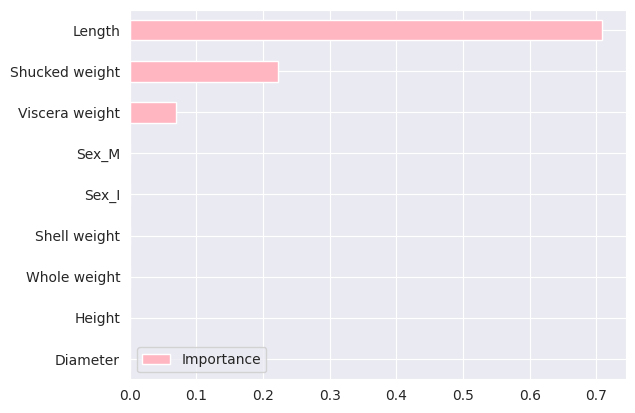

In [ ]:

# buat sebuah dataframe untuk model importance
importance_rf = pd.DataFrame(rf.feature_importances_, index = inputs_train.columns)
# Rename index
importance_rf.columns = ['Importance']
#Sort values
importance_rf_sorted = importance_rf.sort_values(by='Importance', ascending=True)
importance_rf_sorted.plot(kind='barh', color='lightpink')
plt.show()

- Prediktor terbaik untuk usia adalah panjang, shucked weight dan viscera weight.
- di mana panjang adalah prediksi yang paling penting